In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
################ COMPARE RADIAL DISTRIBUTION OF YAW MISALIGNMENT  #############
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as mpyplot
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/pl/active/JKL_IDEAL/hurricanes/sst_26/"
WRF_DIRECTORY_28 = "/pl/active/JKL_IDEAL/hurricanes/sst_28/" 
WRF_DIRECTORY_30 = "/pl/active/JKL_IDEAL/hurricanes/sst_30/"  
WRF_DIRECTORY_32 = "/pl/active/JKL_IDEAL/hurricanes/sst_32/"  #"/rc_scratch/misa5952/hurricanes/nudge_sst_32/"   
WRF_DIRECTORY_34 = "/pl/active/JKL_IDEAL/hurricanes/sst_34/" #"/rc_scratch/misa5952/hurricanes/sst_34_NBA/"  

fileName = 'yawMis_distr.txt'

dirFig = "/pl/active/JKL_IDEAL/hurricanes/Figures/"


In [3]:
#%% Extract pdf for yaw misalignment
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',',skiprows=1)
binnss_26 = file_26[:,0]
hist_26 = file_26[:,1:]
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',',max_rows=1)
r_26 = file_26[:]

file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',',skiprows=1)
binnss_28 = file_28[:,0]
hist_28 = file_28[:,1:]
file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',',max_rows=1)
r_28 = file_28[:]

file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',',skiprows=1)
binnss_30 = file_30[:,0]
hist_30 = file_30[:,1:]
file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',',max_rows=1)
r_30 = file_30[:]

file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',',skiprows=1)
binnss_32 = file_32[:,0]
hist_32 = file_32[:,1:]
file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',',max_rows=1)
r_32 = file_32[:]

file_34 = np.loadtxt(WRF_DIRECTORY_34+fileName,delimiter=',',skiprows=1)
binnss_34 = file_34[:,0]
hist_34 = file_34[:,1:]
file_34 = np.loadtxt(WRF_DIRECTORY_34+fileName,delimiter=',',max_rows=1)
r_34 = file_34[:]

In [4]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_32 = 'tab:purple'
cols = [col_26,col_28,col_30,col_32,col_32]


In [5]:
#%% Eyewall for each case
r_eye_26 = 13805
r_eye_28 = 21300
r_eye_30 = 20333
r_eye_32 = 27055
r_eye_34 = 33638.915


In [6]:
#%% Find radial locations of interest
r_r = np.arange(0.8,1.3,0.1)

i_r_26 = np.zeros(len(r_r))
i_r_28 = np.zeros(len(r_r))
i_r_30 = np.zeros(len(r_r))
i_r_32 = np.zeros(len(r_r))
i_r_34 = np.zeros(len(r_r))

for i in np.arange(len(r_r)):
    i_r_26[i] = np.argmin(np.abs(r_26/r_eye_26 - r_r[i]))
    i_r_28[i] = np.argmin(np.abs(r_28/r_eye_28 - r_r[i]))
    i_r_30[i] = np.argmin(np.abs(r_30/r_eye_30 - r_r[i]))
    i_r_32[i] = np.argmin(np.abs(r_32/r_eye_32 - r_r[i]))
    i_r_34[i] = np.argmin(np.abs(r_34/r_eye_34 - r_r[i]))

i_r_26 = i_r_26.astype('int')
i_r_28 = i_r_28.astype('int')
i_r_30 = i_r_30.astype('int')
i_r_32 = i_r_32.astype('int')
i_r_34 = i_r_34.astype('int')

<ipython-input-7-bf776f99b9ec>:50: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  mpyplot.tight_layout()


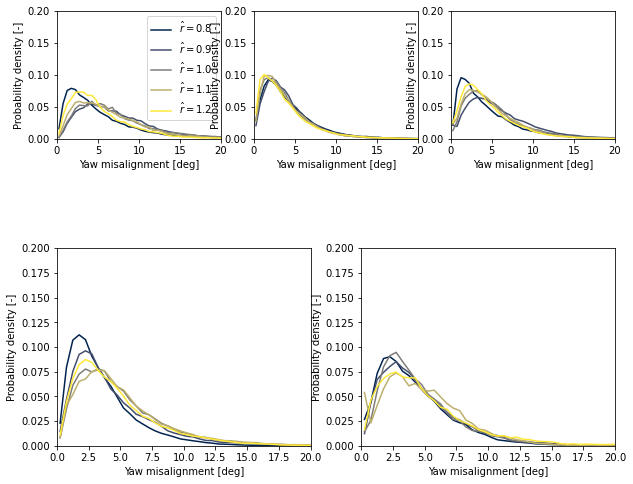

In [7]:
#%% Figure showing yaw misalignment histogram at different radial locations for each hurricane
colores = mpyplot.cm.cividis(np.linspace(0,1,len(r_r)))

limX = [0,20]


mpyplot.figure(figsize=(10,8))
mpyplot.subplot(3,3,1)
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_26,hist_26[:,i_r_26[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.legend()
mpyplot.xlim(limX)
mpyplot.ylim(0,0.2)
mpyplot.xlabel('Yaw misalignment [deg]')
mpyplot.ylabel('Probability density [-]')

mpyplot.subplot(3,3,2)
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_28,hist_28[:,i_r_28[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.xlim(limX)
mpyplot.ylim(0,0.2)
mpyplot.xlabel('Yaw misalignment [deg]')
mpyplot.ylabel('Probability density [-]')

mpyplot.subplot(3,3,3)
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_30,hist_30[:,i_r_30[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.xlim(limX)
mpyplot.ylim(0,0.2)
mpyplot.xlabel('Yaw misalignment [deg]')
mpyplot.ylabel('Probability density [-]')

mpyplot.subplot(2,2,3)
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_32,hist_32[:,i_r_32[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.xlim(limX)
mpyplot.ylim(0,0.2)
mpyplot.xlabel('Yaw misalignment [deg]')
mpyplot.ylabel('Probability density [-]')

mpyplot.subplot(2,2,4)
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_34,hist_34[:,i_r_34[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.xlim(limX)
mpyplot.ylim(0,0.2)
mpyplot.xlabel('Yaw misalignment [deg]')
mpyplot.ylabel('Probability density [-]')


mpyplot.tight_layout()
mpyplot.show()


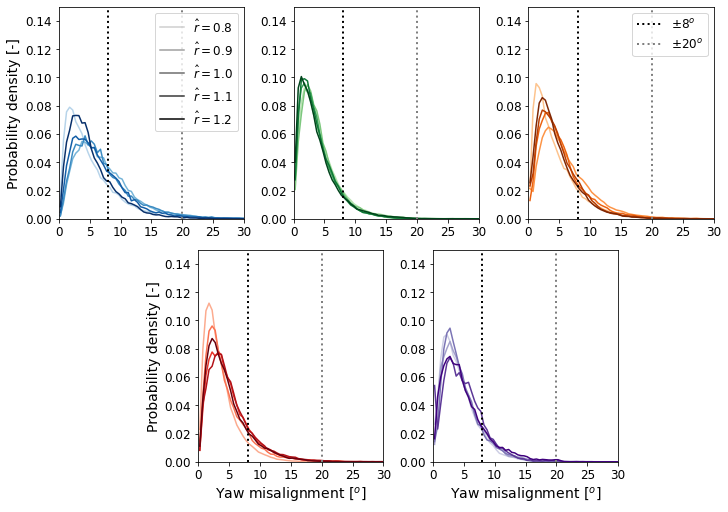

In [19]:
#%% Figure showing yaw misalignment histogram at different radial locations for each hurricane

limX = [0,30]
limY = [0,0.15]

import matplotlib.gridspec as gridspec

fig3 = mpyplot.figure(figsize=(10,7),constrained_layout=True)
gs = fig3.add_gridspec(2, 6)

f3_ax1 = fig3.add_subplot(gs[0, 0:2])
colores = mpyplot.cm.Blues(np.linspace(0.3,1,len(r_r)))
colores_legend = mpyplot.cm.Greys(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_26,hist_26[:,i_r_26[i_r]],color=colores[i_r])
    # For legend
    mpyplot.plot(-1*binnss_26,-1*hist_26[:,i_r_26[i_r]],color=colores_legend[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.plot([8,8],limY,':k',linewidth=2)
mpyplot.plot([20,20],limY,':',color='grey',linewidth=2)
mpyplot.legend(fontsize=12)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
# mpyplot.xlabel('Yaw misalignment [deg]')
mpyplot.ylabel('Probability density [-]',fontsize=14)

f3_ax1 = fig3.add_subplot(gs[0, 2:4])
colores = mpyplot.cm.Greens(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_28,hist_28[:,i_r_28[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.plot([8,8],limY,':k',linewidth=2)
mpyplot.plot([20,20],limY,':',color='grey',linewidth=2)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
# mpyplot.xlabel('Yaw misalignment [deg]')
# mpyplot.ylabel('Probability density [-]')

f3_ax1 = fig3.add_subplot(gs[0, 4:6])
colores = mpyplot.cm.Oranges(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_30,hist_30[:,i_r_30[i_r]],color=colores[i_r])#,label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.plot([8,8],limY,':k',linewidth=2,label=r"$\pm 8^{o}$")
mpyplot.plot([20,20],limY,':',color='grey',linewidth=2,label=r"$\pm 20^{o}$")
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
mpyplot.legend(fontsize=12)
# mpyplot.xlabel('Yaw misalignment [deg]')
# mpyplot.ylabel('Probability density [-]')

f3_ax1 = fig3.add_subplot(gs[1, 1:3])
colores = mpyplot.cm.Reds(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_32,hist_32[:,i_r_32[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.plot([8,8],limY,':k',linewidth=2)
mpyplot.plot([20,20],limY,':',color='grey',linewidth=2)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
mpyplot.xlabel('Yaw misalignment [$^{o}$]',fontsize=14)
mpyplot.ylabel('Probability density [-]',fontsize=14)

f3_ax1 = fig3.add_subplot(gs[1, 3:5])
colores = mpyplot.cm.Purples(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_34,hist_34[:,i_r_34[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.plot([8,8],limY,':k',linewidth=2)
mpyplot.plot([20,20],limY,':',color='grey',linewidth=2)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
mpyplot.xlabel('Yaw misalignment [$^{o}$]',fontsize=14)
# mpyplot.ylabel('Probability density [-]')

mpyplot.savefig(dirFig + "yaw_mis_pdf.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')

# mpyplot.tight_layout()
mpyplot.show()

In [18]:
# Percent of cases that exceed threshold

thres = 20 # 15 8

temp_26 = 0
for i_r in np.arange(len(r_r)):
    temp_26 += np.nansum(hist_26[binnss_26>=thres,i_r_26[i_r]])
temp_26 = temp_26/len(r_r)
print(100*temp_26)

temp_28 = 0
for i_r in np.arange(len(r_r)):
    temp_28 += np.nansum(hist_28[binnss_28>=thres,i_r_28[i_r]])
temp_28 = temp_28/len(r_r)
print(100*temp_28)

temp_30 = 0
for i_r in np.arange(len(r_r)):
    temp_30 += np.nansum(hist_30[binnss_30>=thres,i_r_30[i_r]])
temp_30 = temp_30/len(r_r)
print(100*temp_30)

temp_32 = 0
for i_r in np.arange(len(r_r)):
    temp_32 += np.nansum(hist_32[binnss_32>=thres,i_r_32[i_r]])
temp_32 = temp_32/len(r_r)
print(100*temp_32)

temp_34 = 0
for i_r in np.arange(len(r_r)):
    temp_34 += np.nansum(hist_34[binnss_34>=thres,i_r_34[i_r]])
temp_34 = temp_34/len(r_r)
print(100*temp_34)

1.6602949910864302
0.09580187319959144
0.4503367712990285
0.3225534130606884
0.14751238087472548


In [10]:
100*np.mean([temp_26,temp_28,temp_30,temp_32,temp_34])

2.2039818056802356